In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

In [2]:
def load_img(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img =img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
            
            ctrs,ret = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt = sorted(ctrs,key=lambda ctr: cv2.boundingRect(ctr)[0])
            w = int(28)
            h = int(28)
            maxi = 0
            for c in cnt:
                x,y,width,height = cv2.boundingRect(c)
                area = width * height
                if area > maxi:
                    maxi = area
                    x_max = x
                    y_max = y
                    w_max = width
                    h_max = height
          
            img_crop = thresh[y_max:y_max+h_max+10,x_max : x_max+w_max+10]                 
            img_resize = cv2.resize(img_crop, (28, 28))
            img_resize = np.reshape(img_resize,(784,1))
            train_data.append(img_resize)
    return train_data 

In [3]:
data = []

# Assign - = 10

In [4]:
data = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/-")
for i in range(len(data)):
    data[i] = np.append(data[i], ['10'])

print(len(data))


33997


# Assign + = 11

In [5]:
data11 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/+")
for i in range(0,len(data11)):
    data11[i] = np.append(data11[i], ['11'])
data=np.concatenate((data,data11))

print(len(data))


59109


# Adding 0 to 9

In [6]:
data0 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/0")
for i in range(0,len(data0)):
    data0[i] = np.append(data0[i], ['0'])
data=np.concatenate((data,data0))

print(len(data))

66023


In [7]:
data1 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/1")
for i in range(0,len(data1)):
    data1[i] = np.append(data1[i], ['1'])
data=np.concatenate((data,data1))

print(len(data))


92543


In [8]:
data2 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/2")
for i in range(0,len(data2)):
    data2[i] = np.append(data2[i], ['2'])
data=np.concatenate((data,data2))

print(len(data))


118684


In [9]:
data3 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/3")
for i in range(0,len(data3)):
    data3[i] = np.append(data3[i], ['3'])
data=np.concatenate((data,data3))

print(len(data))


129593


In [10]:
data4 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/4")
for i in range(0,len(data4)):
    data4[i] = np.append(data4[i], ['4'])
data=np.concatenate((data,data4))

print(len(data))


136989


In [11]:
data5 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/5")
for i in range(0,len(data5)):
    data5[i] = np.append(data5[i], ['5'])
data=np.concatenate((data,data5))

print(len(data))


140534


In [12]:
data6 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/6")
for i in range(0,len(data6)):
    data6[i] = np.append(data6[i], ['6'])
data=np.concatenate((data,data6))

print(len(data))


143652


In [13]:
data7 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/7")
for i in range(0,len(data7)):
    data7[i] = np.append(data7[i], ['7'])
data=np.concatenate((data,data7))

print(len(data))


146561


In [14]:
data8 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/8")
for i in range(0,len(data8)):
    data8[i] = np.append(data8[i], ['8'])
data=np.concatenate((data,data8))

print(len(data))


149629


In [15]:
data9 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/9")
for i in range(0,len(data9)):
    data9[i] = np.append(data9[i], ['9'])
data=np.concatenate((data,data9))

print(len(data))


153366


In [16]:
data12 = load_img("/Users/kirtan/Downloads/archive (1)/extracted_images/times")
for i in range(0,len(data12)):
    data12[i] = np.append(data12[i], ['12'])
data=np.concatenate((data,data12))

print(len(data))


156617


# Make  a .csv file of the collected data

In [17]:
df = pd.DataFrame(data,index=None)
df.to_csv('Kirtan_Trains.csv',index=False)

# Read the data of the file

In [72]:
df_train = pd.read_csv('/Users/kirtan/Kirtan_Trains.csv',index_col=False)
labels = df_train[['784']]


In [73]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [74]:
np.random.seed(1212)
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [75]:
labels = np.array(labels)

In [76]:
from keras.utils.np_utils import to_categorical
cat = to_categorical(labels,num_classes=13)

In [77]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [78]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [79]:
df_train.shape

(156617, 784)

In [80]:
temp = df_train.to_numpy()

In [81]:
x_train = temp.reshape(temp.shape[0],28,28,1)

In [82]:
temp.shape[0]

156617

In [83]:
x_train.shape

(156617, 28, 28, 1)

In [84]:
l=[]
for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [85]:
np.random.seed(7)

In [86]:
len(l[0])

1

In [87]:
x_train.shape

(156617, 28, 28, 1)

In [88]:
#convolution netural network
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(15,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [89]:
from keras.models import model_from_json

In [90]:
model.fit(x_train, cat , epochs=10,batch_size=200,shuffle=True,verbose=1)


Epoch 1/10
784/784 [==============================] - 43s 54ms/step - loss: 0.6317 - accuracy: 0.8433
Epoch 2/10
784/784 [==============================] - 41s 53ms/step - loss: 0.1790 - accuracy: 0.9471
Epoch 3/10
784/784 [==============================] - 42s 54ms/step - loss: 0.1456 - accuracy: 0.9576
Epoch 4/10
784/784 [==============================] - 42s 54ms/step - loss: 0.1176 - accuracy: 0.9658
Epoch 5/10
784/784 [==============================] - 42s 54ms/step - loss: 0.1047 - accuracy: 0.9690
Epoch 6/10
784/784 [==============================] - 46s 58ms/step - loss: 0.0943 - accuracy: 0.9722
Epoch 7/10
784/784 [==============================] - 48s 61ms/step - loss: 0.0775 - accuracy: 0.9772
Epoch 8/10
784/784 [==============================] - 43s 55ms/step - loss: 0.0653 - accuracy: 0.9807
Epoch 9/10
784/784 [==============================] - 42s 54ms/step - loss: 0.0571 - accuracy: 0.9833
Epoch 10/10
784/784 [==============================] - 43s 55ms/step - loss: 0.050

In [91]:
model_json = model.to_json()
with open("FINAL_MODEL.json","w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("FINAL_MODEL.h5")

In [92]:
json_file = open('FINAL_MODEL.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
#trained weight
loaded_model.load_weights("FINAL_MODEL.h5")

# Test Image

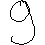

In [93]:
from IPython.display import Image
Image(filename='/Users/kirtan/Downloads/archive (1)/extracted_images/9/9_50610.jpg',width=200,height=200)


In [94]:
img = cv2.imread('/Users/kirtan/Downloads/archive (1)/extracted_images/9/9_50610.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [95]:
if img is not None:
    #images.append(img)
    img = ~img
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ctrs, ret = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28) 
    h = int(28)
    train_data = []
    print(len(cnt))
    rects = []
    for c in cnt:
        x, y, w, h = cv2.boundingRect(c) 
        rect = [x, y, w, h] 
        rects.append(rect)
    print(rects)
    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0 
            if rec != r:
                if r[0] < (rec[0] + rec[2] + 10) and rec[0] < (r[0] + r[2] + 10) and r[1] < (rec[1] + rec[3] + 10) and rec[1] < (r[1] + r[3] + 10):
                    flag = 1
                l.append(flag)
            if rec == r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect = []
    for i in range(0, len(cnt)):
        for j in range(0, len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2] * rects[i][3] 
                area2 = rects[j][2] * rects[j][3] 
                if area1 == min(area1, area2):
                    dump_rect.append(rects[i])    
                    
    print(len(dump_rect))
    final_rect = [i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+10, x:x+w+10]
            
        im_resize = cv2.resize(im_crop, (28, 28))
            
        im_resize = np.reshape(im_resize, (28, 28, 1))
        train_data.append(im_resize)


4
[[10, 0, 25, 45], [10, 0, 20, 22], [26, 5, 3, 3], [27, 7, 3, 3]]
[[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]
7
[[10, 0, 25, 45]]


In [97]:
output = ''
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1,28,28,1)
    result = np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    print(result[0])
    if result[0] == 10:
        output += '-'
    elif result[0] == 11:
        output += '+'
    elif result[0] == 12:
        output += '*'
    elif result[0] == 0:
        output += '0'    
    elif result[0] == 1:
        output += '1'   
    elif result[0] == 2:
        output += '2'    
    elif result[0] == 3:
        output += '3'    
    elif result[0] == 4:
        output += '4'
    elif result[0] == 5:
        output += '5'    
    elif result[0] == 6:
        output += '6'    
    elif result[0] == 7:
        output += '7'    
    elif result[0] == 8:
        output += '8'    
    elif result[0] == 9:
        output += '9'        
        
print(output)


1/1 [==============================] - 0s 23ms/step
9
9


In [98]:
eval(output)

9